In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
fs=12
path = ('/media/storage_3/mb/nanopore_data/analysis/r9.4.1/20200914_1354_6B_PAF27096_e7c9eae6/' +
        'guppy_v4.0.11_r9.4.1_hac_prom/align_unfiltered/chr22/nanopolish/chr22/')

---
# load npy

In [2]:
num_of_kmer = np.load(path+'num_of_kmer.npy', allow_pickle=True).item()
time_and_current_per_kmer = np.load(path+'time_and_current_per_kmer.npy', allow_pickle=True).item()
print(len(num_of_kmer)) # <=4096

4093


In [3]:
kmers_w_max_num = np.array(sorted(num_of_kmer.items(), key=lambda x:x[1])[::-1])
# kmers előfordulási gyakoriság szerint csökkenő sorrend

In [4]:
current, time = np.zeros((5,2)), np.zeros((5,2)) 
for i, k in enumerate(kmers_w_max_num[:,0][:5]):
    time[i,0] = np.round(np.mean((time_and_current_per_kmer[k][0]*1000)), 2)
    time[i,1] = np.round(np.std(time_and_current_per_kmer[k][0]*1000), 2)
    current[i,0] = np.round(np.mean(time_and_current_per_kmer[k][1]),2)
    current[i,1] = np.round(np.std(time_and_current_per_kmer[k][1]), 2)


In [5]:
# Táblázat a klaszterek középpontjáról.
for i in range(5):
    print(kmers_w_max_num[:,0][i], '& $', current[i,0], '\pm', current[i,1], '$ &',  '$', time[i,0], '\pm', time[i,1], '$ \\\ \hline', )

AAAAAA & $ 88.79 \pm 1.13 $ & $ 50.29 \pm 49.07 $ \\ \hline
TCCATT & $ 100.98 \pm 1.68 $ & $ 261.47 \pm 92.18 $ \\ \hline
CCATTC & $ 76.76 \pm 1.04 $ & $ 277.05 \pm 87.68 $ \\ \hline
ATTCCA & $ 87.15 \pm 3.71 $ & $ 207.9 \pm 80.33 $ \\ \hline
TTCCAT & $ 93.45 \pm 1.16 $ & $ 254.98 \pm 97.08 $ \\ \hline


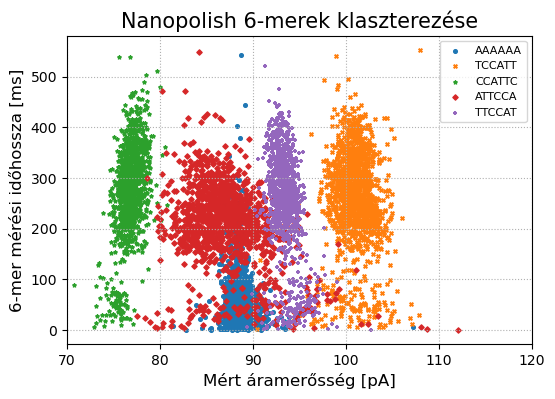

In [6]:
plt.figure(figsize=(6,4))

markers = ['o', 'x', '*', 'D', '+']
for i, k in enumerate(kmers_w_max_num[:,0][:5]):
    plt.scatter(time_and_current_per_kmer[k][1], time_and_current_per_kmer[k][0]*1000, marker=markers[i], s=7, label=k)

plt.title('Nanopolish 6-merek klaszterezése', fontsize=fs+3)
plt.xlabel('Mért áramerősség [pA]', fontsize=fs)
plt.ylabel('6-mer mérési időhossza [ms]', fontsize=fs)
plt.legend(fontsize=fs-4)
plt.grid(ls='dotted')
plt.xlim(70,120)
plt.savefig('figs/cluster_top10_6mers.pdf', bbox_inches='tight')
plt.show()

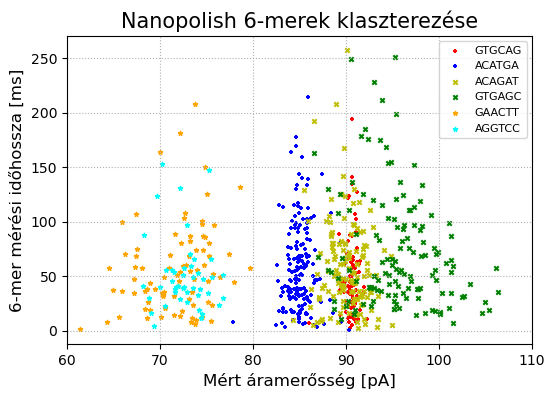

In [7]:
random_6mers = ['GTGCAG', 'ACATGA', 'ACAGAT', 'GTGAGC', 'GAACTT', 'AGGTCC']


plt.figure(figsize=(6,4))
markers = ['+', 'x', '*']
colors = ['r', 'b', 'y', 'g', 'orange', 'cyan']
for i, k in enumerate(random_6mers):
    plt.scatter(time_and_current_per_kmer[k][1], time_and_current_per_kmer[k][0]*1000, marker=markers[int(i-i/2)], s=10, color=colors[i], label=k)

plt.title('Nanopolish 6-merek klaszterezése', fontsize=fs+3)
plt.xlabel('Mért áramerősség [pA]', fontsize=fs)
plt.ylabel('6-mer mérési időhossza [ms]', fontsize=fs)
plt.legend(fontsize=fs-4)
plt.grid(ls='dotted')
plt.xlim(60,110)
plt.savefig('figs/cluster_3random_6mer.pdf', bbox_inches='tight')
plt.show()